In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [13]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = tf.compat.v1.InteractiveSession(config=config)

In [14]:
IMAGE_SIZE = (224, 224)

In [15]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\dushy\Downloads\archive (14)\data\train',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=24,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=True,
    crop_to_aspect_ratio=False,
)

Found 1924 files belonging to 2 classes.


In [16]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip=True,
                             rotation_range=30,
                             validation_split=0.3,
                             fill_mode='nearest'
                             )
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory(r'C:\Users\dushy\Downloads\archive (14)\data\train', 
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=100,
                                       subset='training',
                                       seed=24)
# prepare an iterators for each dataset
val_it = datagen.flow_from_directory(r'C:\Users\dushy\Downloads\archive (14)\data\train', 
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=100,
                                       subset='validation',
                                       seed=24)

Found 1348 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [17]:
base_model = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [18]:
x = base_model.output
x = Flatten()(x)
predictions = Dense(len(train_it.class_indices), activation='softmax')(x)

In [19]:
model = Model(inputs=base_model.input, outputs=predictions)

In [20]:
for layer in base_model.layers:
    layer.trainable = False

In [21]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_it,
    validation_data=val_it,
    epochs=10,
    steps_per_epoch=len(train_it),
    validation_steps=len(val_it)
)

Epoch 1/10
14/14 [==============================] - 123s 9s/step - loss: 2.6538 - accuracy: 0.5549 - val_loss: 0.1644 - val_accuracy: 0.9566
Epoch 2/10
14/14 [==============================] - 121s 9s/step - loss: 0.3375 - accuracy: 0.8828 - val_loss: 0.1529 - val_accuracy: 0.9323
Epoch 3/10
14/14 [==============================] - 124s 9s/step - loss: 0.1480 - accuracy: 0.9466 - val_loss: 0.1126 - val_accuracy: 0.9670
Epoch 4/10
14/14 [==============================] - 118s 9s/step - loss: 0.1046 - accuracy: 0.9659 - val_loss: 0.0756 - val_accuracy: 0.9740
Epoch 5/10
14/14 [==============================] - 110s 8s/step - loss: 0.0950 - accuracy: 0.9740 - val_loss: 0.0782 - val_accuracy: 0.9757
Epoch 6/10
14/14 [==============================] - 111s 8s/step - loss: 0.0766 - accuracy: 0.9755 - val_loss: 0.0748 - val_accuracy: 0.9792
Epoch 7/10
14/14 [==============================] - 111s 8s/step - loss: 0.0931 - accuracy: 0.9711 - val_loss: 0.0993 - val_accuracy: 0.9601
Epoch 8/10
14

In [23]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

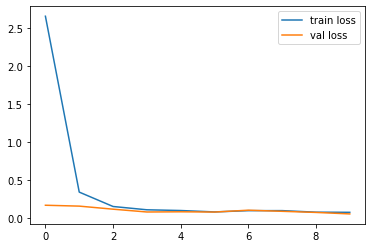

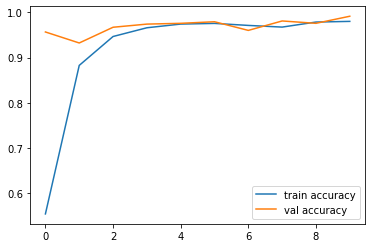

In [24]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [25]:
model_loss_train, model_train_acc = model.evaluate(train_it)
print("Model has a loss of %.2f and accuracy %.2f%%" % (model_loss_train, model_train_acc*100))

14/14 [==============================] - 77s 5s/step - loss: 0.0573 - accuracy: 0.9844
Model has a loss of 0.06 and accuracy 98.44%


In [26]:
model_loss, model_acc = model.evaluate(val_it)
print("Model has a loss of %.2f and accuracy %.2f%%" % (model_loss, model_acc*100))

6/6 [==============================] - 35s 6s/step - loss: 0.0617 - accuracy: 0.9792
Model has a loss of 0.06 and accuracy 97.92%


In [27]:
model.save('model_resnet50.h5')